## Import Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

## Set Constraints

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 100

## Source Of Dataset

In [7]:
directory_path = r'C:\Users\ARYAN GUPTA\OneDrive\Desktop\Attendify - Final Project\static\faces'

## Preprocess Dataset

In [25]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory_path,
    shuffle = "True",
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE)

Found 1601 files belonging to 32 classes.


## Display All Classes

In [26]:
class_names = dataset.class_names
class_names

['AasawariKaur_18',
 'AdityaAgarwal_8',
 'AdityaKumar_32',
 'AdityaLohia_24',
 'AkshatAgrawal_3',
 'AkshitTyagi_28',
 'AryanArora_17',
 'AryanGupta_2',
 'AsthaRaghuvanshi_6',
 'AyushAgarwal_13',
 'BhavukMehta_1',
 'HrishitaSingh_19',
 'IshikaShukla_25',
 'Lawleen_21',
 'Madhav_30',
 'ManyaSrivastava_15',
 'NishantGupta_4',
 'NityaKapur_27',
 'PritpalSingh_11',
 'Samriddhi_26',
 'SarthakGupta_16',
 'Satyam_22',
 'ShikharGupta_12',
 'ShivanshKinra_29',
 'ShreyaChauhan_20',
 'ShubhamRawat_14',
 'ShubhayGautam_10',
 'SomyaSethi_5',
 'TanishGoyal_31',
 'TanyaGupta_7',
 'UjjawalJain_23',
 'YashAgarwal_9']

In [27]:
len(dataset)

51

In [28]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[24 16 15 10  9 19 14  0 26 31  9 18 21  9  9 19 22 31  3 20  0  6 13 13
 17  5 20  5  2 20 29 21]


## Inspection of the Dataset

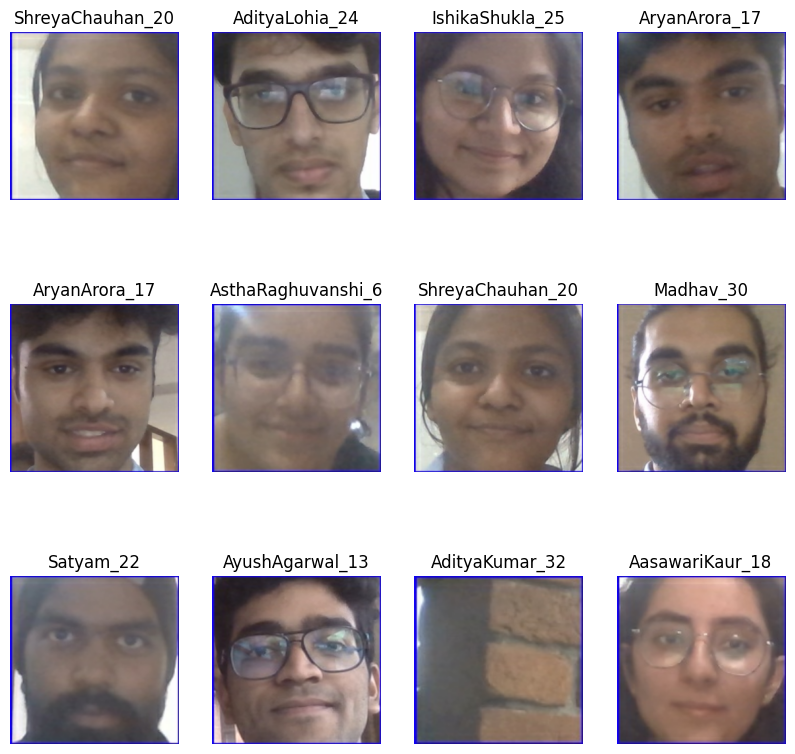

In [29]:
plt.figure(figsize=(10, 10))
from numpy import uint16
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
   

## Dividing Dataset into Training, Validation and Testing Dataset

In [30]:
def get_dataset_partitions_tf(dataset, train_split=0.6, val_split=0.2, test_split=0.2, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(dataset)
    
    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_dataset = dataset.take(train_size)    
    val_dataset = dataset.skip(train_size).take(val_size)
    test_dataset = dataset.skip(train_size).skip(val_size)
    
    return train_dataset, val_dataset, test_dataset


In [31]:
train_dataset, val_dataset, test_dataset = get_dataset_partitions_tf(dataset)

In [32]:
len(train_dataset)

30

In [33]:
len(val_dataset)

10

In [53]:
len(test_dataset)

11

# Building Model

## Resize and Rescale

In [35]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1./255),
])

## Data Augmentation

In [36]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

## Model Architecture

In [37]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 32

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax"),
])
model.build(input_shape=input_shape)

In [38]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

## Model Compilation

In [39]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

## Train Model

In [40]:
history = model.fit(
    train_dataset,
    batch_size=BATCH_SIZE,
    validation_data=val_dataset,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/100


30/30 [==============================] - 60s 2s/step - loss: 3.4677 - accuracy: 0.0312 - val_loss: 3.4621 - val_accuracy: 0.0312
Epoch 2/100
30/30 [==============================] - 46s 1s/step - loss: 3.4345 - accuracy: 0.0538 - val_loss: 3.3093 - val_accuracy: 0.0812
Epoch 3/100
30/30 [==============================] - 42s 1s/step - loss: 3.2065 - accuracy: 0.0760 - val_loss: 2.9939 - val_accuracy: 0.1419
Epoch 4/100
30/30 [==============================] - 47s 2s/step - loss: 2.7764 - accuracy: 0.1740 - val_loss: 2.5033 - val_accuracy: 0.1661
Epoch 5/100
30/30 [==============================] - 36s 1s/step - loss: 2.4520 - accuracy: 0.2433 - val_loss: 2.4491 - val_accuracy: 0.2699
Epoch 6/100
30/30 [==============================] - 37s 1s/step - loss: 2.1622 - accuracy: 0.3104 - val_loss: 1.9358 - val_accuracy: 0.4375
Epoch 7/100
30/30 [==============================] - 36s 1s/step - loss: 1.9114 - accuracy: 0.3821 - val_loss: 1.9193 - val_accuracy: 0.3594
Epoch 8/100

## Model Accuracy

In [41]:
result = model.evaluate(test_dataset)

11/11 [==============================] - 3s 177ms/step - loss: 0.1018 - accuracy: 0.9716


In [42]:
result

[0.10181122273206711, 0.9715909361839294]

In [43]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 30}

In [44]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [45]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

loss = history.history['loss']
validation_loss = history.history['val_loss']

## Training and Validation Graphs

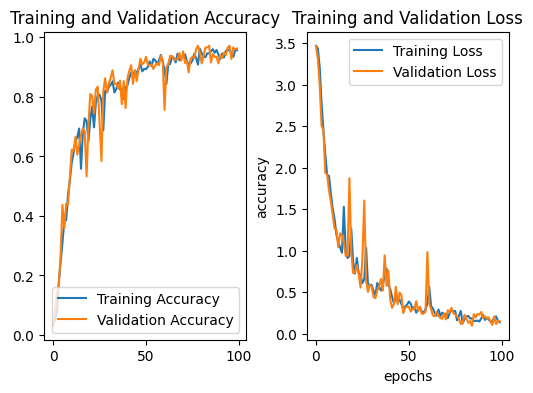

In [46]:
plt.figure(figsize=(6, 4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label='Training Accuracy')
plt.plot(range(EPOCHS), validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title('Training and Validation Loss')
plt.subplots_adjust(wspace=0.3)
plt.show()


## Run Prediction on Sample Images

first image to predict
actual label: Madhav_30
1/1 [==============================] - 1s 594ms/step
predicted label: Madhav_30


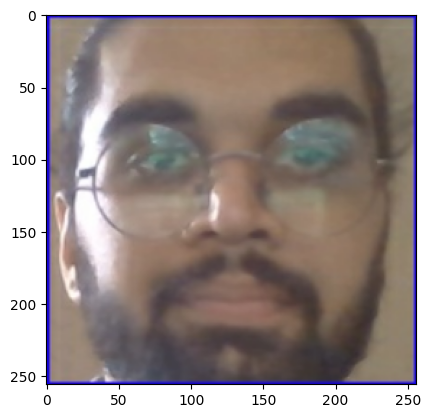

In [47]:
import numpy as np
for images_batch, labels_batch in test_dataset.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])


In [48]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 22ms/step


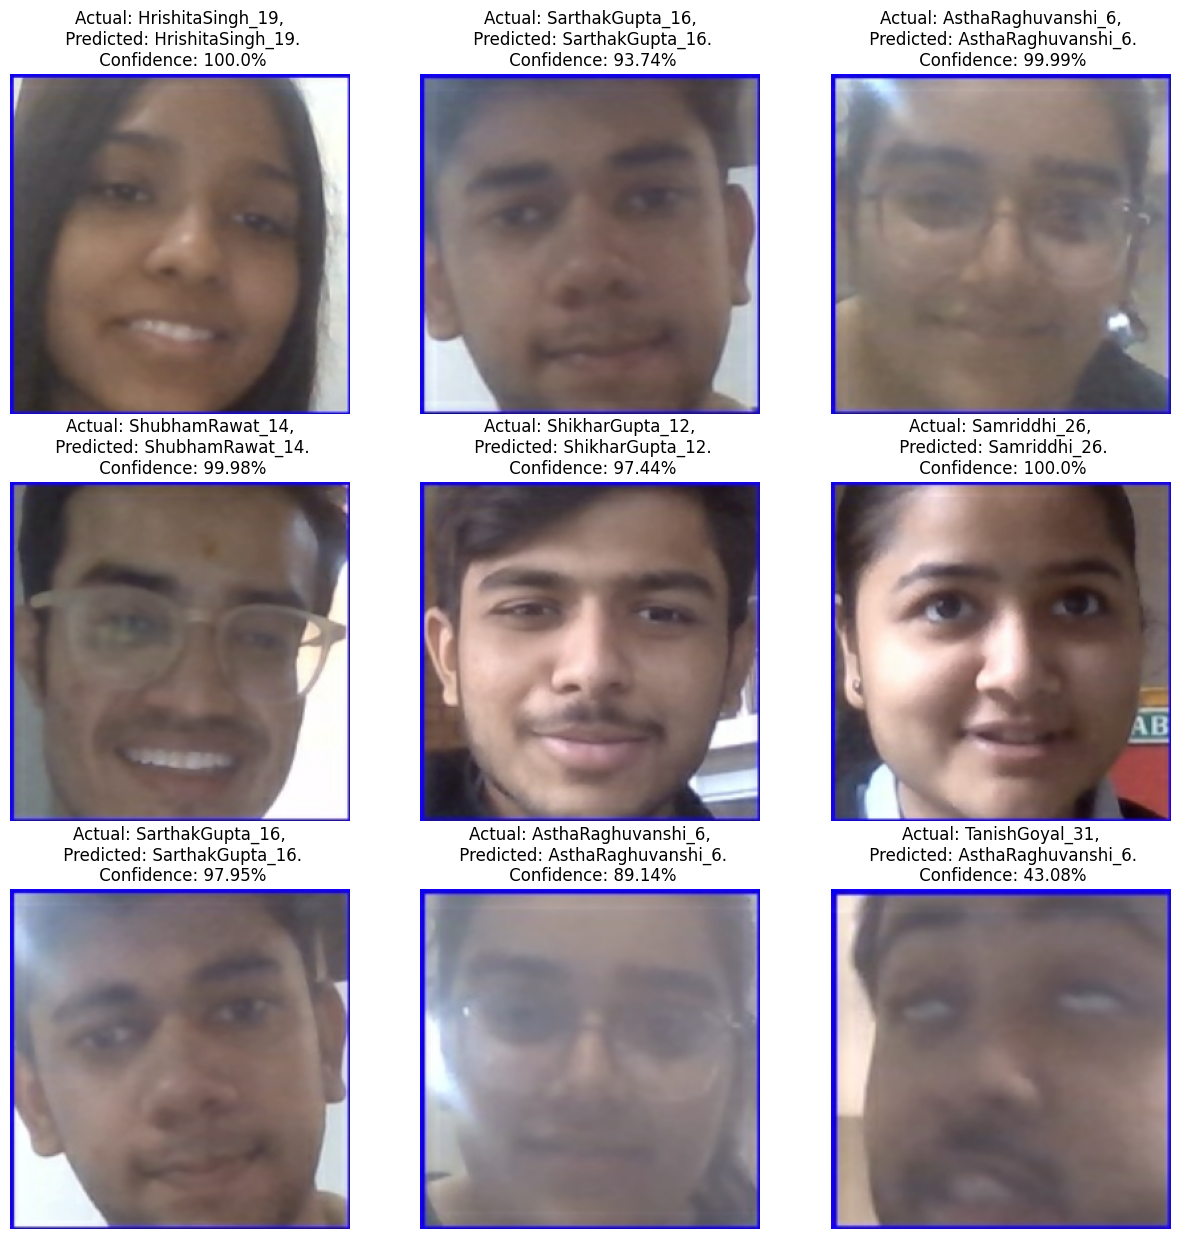

In [49]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")


## Save Trained Model

In [50]:
import os
import joblib
joblib.dump(model, 'cnn_model.h5')

['cnn_model.h5']